# Tests with different dataset sizes

In [1]:
import os
os.chdir('..')
os.getcwd()

'c:\\Users\\ChangWeiYueh\\Desktop\\recommendation-cold-start\\Personalized-News-Recommendation-master'

In [2]:
%load_ext autoreload
%autoreload 2
from bandits import *
from evaluator import evaluate
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
%%time
#2 3 4 5 6 7 8 9 10
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_020090502","dataset/R6/ydata-fp-td-clicks-v1_020090503","dataset/R6/ydata-fp-td-clicks-v1_020090504","dataset/R6/ydata-fp-td-clicks-v1_020090505")
dataset.get_yahoo_events(files)

KeyboardInterrupt: 

In [ ]:
_, deploy = evaluate(Egreedy(1))
rnd_ctr = deploy[-1]

Egreedy (ε=1)       0.0363    4.0m


Egreedy (ε=0.1)     0.0517    6.8m
Egreedy (ε=0.1)     0.0523    53.7m
Egreedy (ε=0.1)     0.0541    25.7m
Egreedy (ε=0.1)     0.0557    12.3m


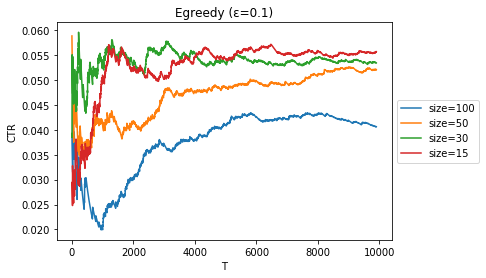

UCB1 (α=0.1)        0.0523    9.2m
UCB1 (α=0.1)        0.0544    22.8m
UCB1 (α=0.1)        0.0518    13.1m
UCB1 (α=0.1)        0.052     11.3m


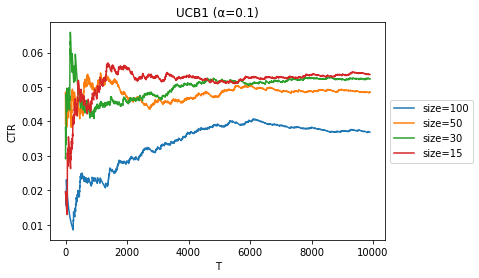

LinUCB (α=0.3, context:both)0.0635    34.7m
LinUCB (α=0.3, context:both)0.0649    108.1m
LinUCB (α=0.3, context:both)0.0628    61.2m
LinUCB (α=0.3, context:both)0.0686    34.2m


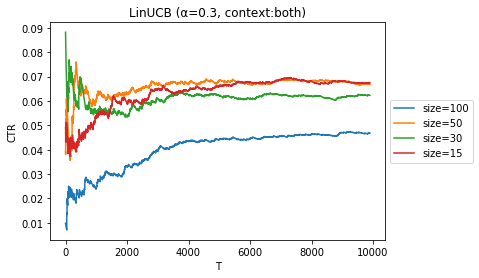

LinUCB (α=0.3, context:user)0.0636    24.5m
LinUCB (α=0.3, context:user)0.0621    87.5m
LinUCB (α=0.3, context:user)0.0624    50.5m
LinUCB (α=0.3, context:user)0.0662    29.6m


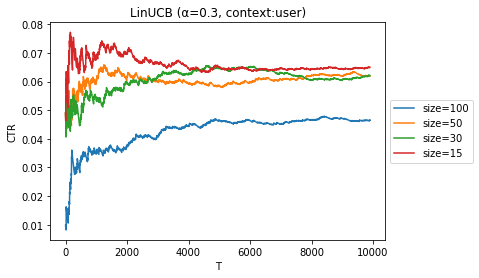

In [ ]:
sizes = [100,50,30,15]
results = [['Size','Bucket','Algorithm','CTR Lift']]

algorithms = [Egreedy(0.1),Ucb1(0.1),LinUCB(0.3, context="both"), LinUCB(0.3, context="user")]

for test in algorithms:
    for size in sizes:
        learn ,deploy = evaluate(test,size=size)
        results.append([size,'learn',test.algorithm, learn[-1]/rnd_ctr])
        results.append([size,'deploy',test.algorithm, deploy[-1]/rnd_ctr])
        plt.plot(deploy[100:10000], label="size={}".format(size))
        
    plt.title(test.algorithm)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
df = pd.DataFrame(results)
df.columns = df.iloc[0]
df = df[1:]
df

,Size,Bucket,Algorithm,CTR Lift
1,100,learn,Egreedy (ε=0.1),1.44716
2,100,deploy,Egreedy (ε=0.1),1.42428
3,50,learn,Egreedy (ε=0.1),1.45839
4,50,deploy,Egreedy (ε=0.1),1.43957
5,30,learn,Egreedy (ε=0.1),1.48527
6,30,deploy,Egreedy (ε=0.1),1.48932
7,15,learn,Egreedy (ε=0.1),1.50462
8,15,deploy,Egreedy (ε=0.1),1.53487
9,100,learn,UCB1 (α=0.1),1.49104
10,100,deploy,UCB1 (α=0.1),1.43974
